# LOC CodeAgainstCancer
This notebook will help us calculate the lines of code that each member of CodeAgainstCancer has contributed towards the project. This will be crucial to keep up with our metrics and to make sure that we are on schedule for our deadlines.

## Loading the data

In [72]:
import pandas as pd

# Load CSV data
data = pd.read_csv('../data/results_LOC.csv')

data.head()

,pageInfo__hasNextPage,pageInfo__endCursor,edges__cursor,edges__node__message,edges__node__committedDate,edges__node__author__name,edges__node__author__email,edges__node__author__user,edges__node__author__user__login,edges__node__additions,edges__node__deletions,edges__node__changedFiles
0,True,788d914136c5fec44cbe26e6a0fe1408b09ef06a 99,788d914136c5fec44cbe26e6a0fe1408b09ef06a 100,"changed styling of login/signup pages, added n...",2024-09-17T23:18:43Z,DanOcho8,98377769+DanOcho8@users.noreply.github.com,NaN,DanOcho8,286,34,13
1,NaN,NaN,788d914136c5fec44cbe26e6a0fe1408b09ef06a 101,update,2024-09-17T05:45:25Z,Kalila Ingco,103094824+kalilaingco@users.noreply.github.com,NaN,kalilaingco,49,12,1
2,NaN,NaN,788d914136c5fec44cbe26e6a0fe1408b09ef06a 102,adding excluded ingredients to recipe page,2024-09-17T04:55:51Z,ecardenas31,ecardenas31@outlook.com,NaN,ecardenas31,58,19,2
3,NaN,NaN,788d914136c5fec44cbe26e6a0fe1408b09ef06a 103,Merge pull request #21 from DanOcho8/Eddie\n\n...,2024-09-07T20:54:38Z,Edwin Peraza,98931477+edwinperaza99@users.noreply.github.com,NaN,edwinperaza99,108,1,9
4,NaN,NaN,788d914136c5fec44cbe26e6a0fe1408b09ef06a 104,Merge branch 'main' into Eddie,2024-09-07T20:53:31Z,Edwin Peraza,98931477+edwinperaza99@users.noreply.github.com,NaN,edwinperaza99,266,154,5


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   pageInfo__hasNextPage             1 non-null      object 
 1   pageInfo__endCursor               1 non-null      object 
 2   edges__cursor                     159 non-null    object 
 3   edges__node__message              159 non-null    object 
 4   edges__node__committedDate        159 non-null    object 
 5   edges__node__author__name         159 non-null    object 
 6   edges__node__author__email        159 non-null    object 
 7   edges__node__author__user         0 non-null      float64
 8   edges__node__author__user__login  154 non-null    object 
 9   edges__node__additions            159 non-null    int64  
 10  edges__node__deletions            159 non-null    int64  
 11  edges__node__changedFiles         159 non-null    int64  
dtypes: float

## Cleaning up the data

In [74]:
# Remove unwanted columns (0, 1, and 7)
data = data.drop(columns=['pageInfo__hasNextPage', 'pageInfo__endCursor', 'edges__node__author__user'])

# Rename columns that start with 'edges__node__' by removing the prefix
data.columns = [col.replace('edges__node__', '') for col in data.columns]

# Display the cleaned DataFrame columns and the first few rows to verify changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   edges__cursor        159 non-null    object
 1   message              159 non-null    object
 2   committedDate        159 non-null    object
 3   author__name         159 non-null    object
 4   author__email        159 non-null    object
 5   author__user__login  154 non-null    object
 6   additions            159 non-null    int64 
 7   deletions            159 non-null    int64 
 8   changedFiles         159 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 11.3+ KB


In [75]:
# Remove irrelevant columns
data = data.drop(columns=['author__email', 'message', 'edges__cursor', 'author__user__login'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   committedDate  159 non-null    object
 1   author__name   159 non-null    object
 2   additions      159 non-null    int64 
 3   deletions      159 non-null    int64 
 4   changedFiles   159 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.3+ KB


In [76]:
# Standardize all names
# Define the mapping of old names to new names
name_mapping = {
    'edwinperaza99': 'Edwin Peraza',
    'DanOcho8': 'Daniel Ochoa',
    'kalilaingco': 'Kalila Ingco',
    'ecardenas31': 'Edward Cardenas',
    'Deja-Who': 'David Vu',
}

# Replace the names in the 'author__name' column
data['author__name'] = data['author__name'].replace(name_mapping)

# Filter out rows where the sum of additions and deletions is more than 4000
data = data[(data['additions'] + data['deletions']) <= 4000]

# Make the 'committedDate' column a datetime object 
data['committedDate'] = pd.to_datetime(data['committedDate'])

# Check the updated DataFrame to verify the changes
data.head()

,committedDate,author__name,additions,deletions,changedFiles
0,2024-09-17 23:18:43+00:00,Daniel Ochoa,286,34,13
1,2024-09-17 05:45:25+00:00,Kalila Ingco,49,12,1
2,2024-09-17 04:55:51+00:00,Edward Cardenas,58,19,2
3,2024-09-07 20:54:38+00:00,Edwin Peraza,108,1,9
4,2024-09-07 20:53:31+00:00,Edwin Peraza,266,154,5


## Plot the data

In [77]:
# Group by author and sum the additions, deletions, and changedFiles
contributions = data.groupby('author__name').agg({
    'additions': 'sum',
    'deletions': 'sum',
    'changedFiles': 'sum'
}).reset_index()

print(contributions)

      author__name  additions  deletions  changedFiles
0     Daniel Ochoa       4992       1645           308
1         David Vu       3378       1507          1153
2  Edward Cardenas       1618        184           107
3     Edwin Peraza      10452       3582           272
4     Kalila Ingco        425        242            18


### Contributions by author

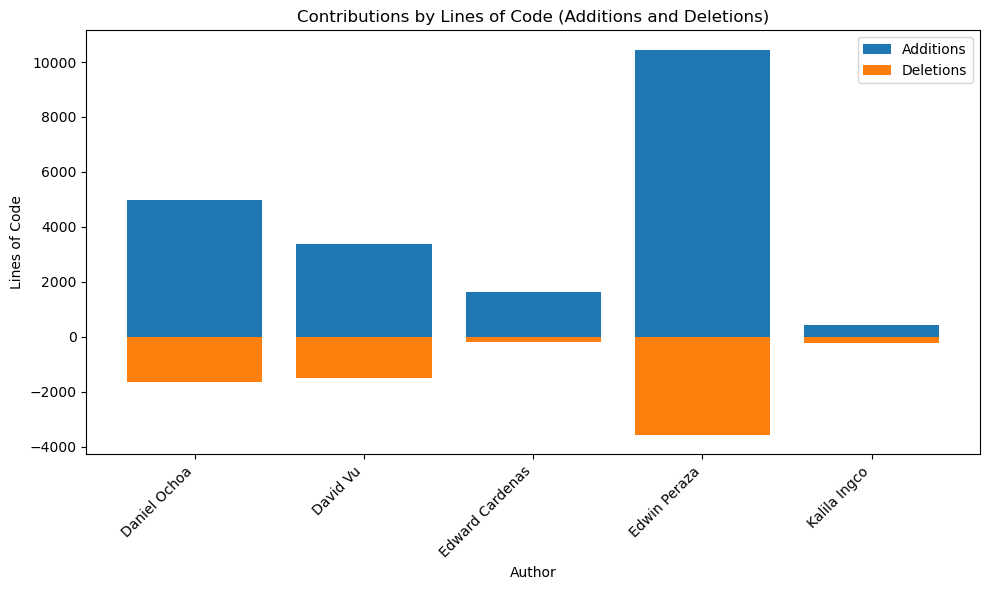

In [78]:
import matplotlib.pyplot as plt

# Plot the contributions
plt.figure(figsize=(10, 6))

# Plot additions
plt.bar(contributions['author__name'], contributions['additions'], label='Additions')

# Plot deletions (as negative values for visual clarity)
plt.bar(contributions['author__name'], -contributions['deletions'], label='Deletions')

plt.xlabel('Author')
plt.ylabel('Lines of Code')
plt.title('Contributions by Lines of Code (Additions and Deletions)')
plt.legend()

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Timeline of Contributions

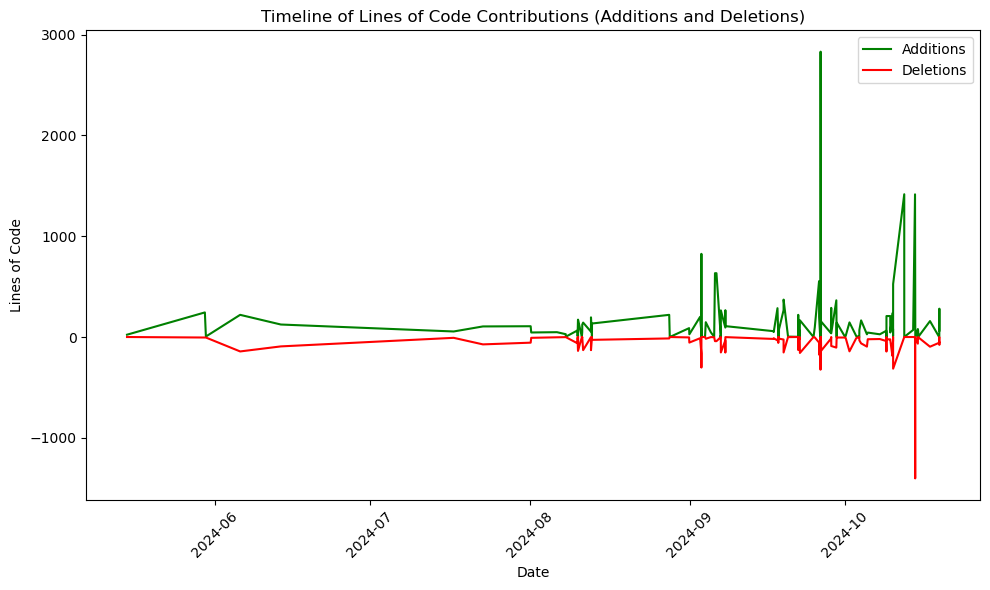

In [80]:
# Group the filtered data by date and sum the additions and deletions
timeline_contributions = data.groupby('committedDate').agg({
    'additions': 'sum',
    'deletions': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Plot additions over time
plt.plot(timeline_contributions['committedDate'], timeline_contributions['additions'], label='Additions', color='green')

# Plot deletions over time (as negative values for clarity)
plt.plot(timeline_contributions['committedDate'], -timeline_contributions['deletions'], label='Deletions', color='red')

plt.xlabel('Date')
plt.ylabel('Lines of Code')
plt.title('Timeline of Lines of Code Contributions (Additions and Deletions)')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Show the second plot (Timeline of Contributions)
plt.show()